In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import copy

In [2]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [3]:
COLUMN_NAME = ['Lunch_1', 'Cal_lunch_1', 'Lunch_2', 'Cal_lunch_2', \
                   'Dinner_1', 'Cal_dinner_1', 'Dinner_2', 'Cal_dinner_2']
DATA_LABELS = {1:2,2:0,5:1,6:0}

## 0. 다운로드한 파일들에서 필요한 내용들만 정제

In [44]:
df_all = pd.DataFrame(columns=COLUMN_NAME)
for n in range(37):
    df = pd.read_csv(f'haksik_dataset/noname({n+1}).csv', \
                     encoding='cp949', index_col=0).reset_index()

    date_l = []
    for i in range(5):
        date = dt.datetime.strptime('2023'+df.columns[i+2][4:9], '%Y%m/%d').date()
        date_l.append(date)
        
    rdf = []
    for j in [0,8]:
        for i in [1,2,5,6]:
            sub_df = df.iloc[i+j-1, DATA_LABELS[i]: DATA_LABELS[i] + 5]
            sub_df.index = date_l
            rdf.append(sub_df)

    rdf = pd.concat(rdf, axis=1)
    rdf.columns = COLUMN_NAME
    df_all = pd.concat([df_all, rdf], axis=0)

In [45]:
for i in [1,3,5,7]:
    df_all.iloc[:,i] = df_all.iloc[:,i].apply(lambda x: x[:-4]).astype(int)
df_all

,Lunch_1,Cal_lunch_1,Lunch_2,Cal_lunch_2,Dinner_1,Cal_dinner_1,Dinner_2,Cal_dinner_2
2023-02-13,함박스테이크\n통살새우가스\n야채샐러드\n단무지\n요구르트,740,들깨미역국\n통살새우가스\n해물볶음우동\n브로콜리참깨소스무침\n김치\n요구르트,780,닭갈비야채덮밥\n마카로니샐러드\n단무지,750,감자다시마국\n덝걸바야채볶음\n마카로니샐러드\n청경채굴소스볶음\n김치\n황도,720
2023-02-14,사천짜장덮밥\n만두탕수\n단무지,810,사천짜장덮밥\n꿔바로우탕수\n해파리냉채\n단무지\n계란국\n파인애플,760,토마토파스타\n마늘빵\n피클,830,(뚝)소고기우거지탕\n제육볶음\n양장피냉채\n감자샐러드\n깍두기,740
2023-02-15,돼지고기김치찌개\n스크램블에그\n도시락김,780,소고기무국\n순대야채볶음\n스크램블에그\n콩나물무침\n도시락김\n김치,750,치킨하이라이스\n생선까스\n단무지,720,배추된장국\n돈사태떡낌\n생선까스\n참나물무침\n깍두기\n쥬시쿨,740
2023-02-16,마파두부덮밥\n야채고로케*케찹\n단무지,720,얼갈이된장국\n데리야끼파닭\n마파두부\n미트무초절이\n김치\n약과,860,오므라이스\n그릴소시지\n오렌지주스\n단무지,720,섞어찌개\n소불고기볶음\n연근샐러드\n건파래볶음\n김치\n오렌지주스,760
2023-02-17,치즈등심돈까스\n양송이스프\n양상추샐러드\n단무지,780,청양초콩나물국\n훈제오리볶음\n연근조림\n상추겉절이\n단호박샐러드\n김치,720,제육야채덮밥\n숙주나물무침\n깍두기,780,오둠어묵탕\n고등어구이\n연두부양념장\n오이양파무침\n숙주무침\n깍두기,750
...,...,...,...,...,...,...,...,...
2023-11-06,돈육김치덮밥\n고로케*케찹\n단무지,960,물만둣국\n깐풍기\n잡채\n유부겨자무침\n도시락김\n깍두기,780,비빔면\n파채무침\n대패삼겹살\n단무지,860,부대찌개\n간장찜닭\n우거지된장지짐\n멸치견과류조림\n미역줄기볶음\n깍두기,880
2023-11-07,치즈등심돈까스\n요구르트\n야채샐러드\n단무지,880,꼬치어묵탕\n제육야채볶음\n우엉조림\n얼갈이된장무침\n알타리\n요구르트,820,제육야채덮밥\n만두탕수\n단무지,860,사천짜장덮밥\n계란탕\n만두탕수\n해파리냉채\n짜사이무침,680
2023-11-08,마파두부덮밥\n닭강정\n깍두기,780,콩나물밥*양념장\n청국장찌개\n두부김치\n오징어브로콜리숙회\n깍두기\n파인애플,800,치킨데리야끼덮밥\n핫도그*케찹\n단무지,880,(뚝)소고기우거지탕\n가자미구이\n감자조림\n도토리묵야채무침\n김치,820
2023-11-09,가라아게카레덮밥\n인절미모닝빵\n깍두기,860,(뚝)북어국\n사채김치볶음\n가지무침\n깍두기\n인절미모닝빵,680,해물볶음우동\n타코야끼\n단무지\n요구르트,780,얼갈이된장국\n돈육김치볶음\n숙주나물\n타코야끼\n도라지오이무침\n알타리,760


In [46]:
df_all.to_csv('haksik_dataset/whole_data.csv', index=True)

## 1. 데이터 뜯어보기

In [4]:
def get_data() -> pd.DataFrame:
    tdf = pd.read_csv('haksik_dataset/whole_data.csv', \
                      dtype={COLUMN_NAME[i]:(int if i%2 else str) for i in range(8)})
    tdf.index = tdf['Unnamed: 0']; tdf.drop(['Unnamed: 0'], inplace=True, axis=1)
    tdf.rename_axis(None, inplace=True)
    return tdf

In [23]:
df_all = get_data()

In [24]:
lunch_main = df_all['Lunch_1'].apply(lambda x: x[:x.find('\n')])
dinner_main = df_all['Dinner_1'].apply(lambda x: x[:x.find('\n')])

main_menu = pd.DataFrame({'Menu':pd.concat([lunch_main, dinner_main]), \
                         'Calories':pd.concat([df_all['Cal_lunch_1'], df_all['Cal_dinner_1']]), \
                         'Is_lunch':[i < len(lunch_main) for i in range(370)]})
ORDER_0 = [i//2 if i%2==0 else i//2+185 for i in range(370)]
main_menu.reset_index(inplace=True)
main_menu = main_menu.reindex(ORDER_0)
main_menu = main_menu.rename({'index':'Date'}, axis=1)
main_menu.reset_index(inplace=True, drop=True)
main_menu

find_element = lambda x: main_menu[main_menu['Menu'] == x]

In [25]:
def menu_info():
    print(f"고유한 메뉴의 개수: {len(main_menu)-sum(main_menu['Menu'].duplicated())}")
    print(f"중복해서 나온 메뉴 비율: {sum(main_menu['Menu'].duplicated(keep=False))} / {len(main_menu)}")

menu_info()

고유한 메뉴의 개수: 99
중복해서 나온 메뉴 비율: 330 / 370


In [26]:
main_menu['Menu'].unique()

array(['함박스테이크', '닭갈비야채덮밥', '사천짜장덮밥', '토마토파스타', '돼지고기김치찌개', '치킨하이라이스',
       '마파두부덮밥', '오므라이스', '치즈등심돈까스', '제육야채덮밥', '육개장', '가라아게카레덮밥',
       '돈육김치덮밥', '(뚝)소고기우거지해장국', '치즈등심돈가스', '가라아게동', '잡채덮밥', '돈육카레라이스',
       '삼일', '치즈돈까스', '바지락순두부찌개', '가츠동', '등심돈까스', '스팸김치덮밥', '소고기우거지탕',
       '치킨까스', '마늘쫑돼지고기덮밥', '떡볶이', '카레라이스', '제육김치야채덮밥', '부대찌개너비아니구이',
       '필라프', '볶음우동', '소고기장터국밥', '부대찌개', '오삼야채덮밥', '소고기버섯불고기덮밥', '유부멸치국수',
       '스팸기치덮밥', '단호박카레라이스', '육개장칼국수', '콩불비빔밥', '짜장덮밥', '(뚝)소고기우거지탕',
       '해물순두부찌개', '치킨데리야끼덮밥', '불고기야채덮밥', '(뚝)육개장', '대만식돼지고기덮밥', '황태콩나물국',
       '돈육김치찌개', '어린이날', '햄야채볶음밥', '스팸도시락비빔밥', '데리야끼덮밥', '오삼불고기덮밥', '라볶이',
       '잔치국수', '카레필라프', '치킨스테이크', '제육김치덮밥', '해물순두두찌개*만두사리', '휴', '김밥볶음밥',
       '부대김치덮밥', '치킨마요덮밥', '사천짜장밥', '제육야채볶음', '파스타', '버섯불고기덮밥', '대패삼겹덮밥',
       '소고기당면덮밥', '가라아게타레덮밥', '해물볶음우동', '김치말이국수', '순두부찌개', '치킨데리야채덮밥',
       '(뚝)우거지해장국', '지코바치밥', '소보로덮밥', '닭갈비덮밥', '운영없', '광복', '(뚝)북어콩나물국',
       '소고기국밥', '소고기야채덮밥', '사천짜장면', '추석연', '임시공휴', '개천', '스파이시치킨

### 1-1. 오타, 휴무일 제거

In [27]:
# (뚝) 제거
# 삼일 어린이날 휴 운영없 광복 추석연 임시공휴 개천 한글 [개교기념일특식] 개교기념 제거
# 스팸기치덮밥 해물순두두찌개*만두사리 대체

main_menu.drop(main_menu[main_menu['Menu'].\
isin('삼일 어린이날 휴 운영없 광복 추석연 임시공휴 개천 한글 [개교기념일특식] 개교기념'.split(' '))].index \
              , inplace=True)

main_menu['Menu'] = main_menu['Menu'].apply(lambda x: x if x.find('(뚝)') == -1 else x[3:])
len(main_menu['Menu'].unique())
main_menu['Date'] = pd.to_datetime(main_menu['Date'])

main_menu.replace('해물순두두찌개*만두사리', '해물순두부찌개', inplace=True)
main_menu.replace('스팸기치덮밥', '스팸김치덮밥',inplace=True)
main_menu.replace('가라아게타레덮밥', '가라아게카레덮밥',inplace=True)
main_menu.replace('치킨데리야채덮밥', '치킨데리야끼덮밥',inplace=True)
main_menu.replace('단호박카레라이스', '카레라이스',inplace=True)
main_menu.replace('소고기국밥', '소고기장터국밥',inplace=True)
main_menu.replace('돈육김치찌개', '돼지고기김치찌개',inplace=True)
main_menu.replace('부대찌개너비아니구이', '부대찌개',inplace=True)
main_menu.replace('해물순두부찌개', '순두부찌개',inplace=True)
main_menu.replace('바지락순두부찌개', '순두부찌개',inplace=True)
main_menu.replace('데리야끼덮밥', '치킨데리야끼덮밥',inplace=True)
main_menu.replace('소고기우거지해장국', '소고기우거지탕',inplace=True)
main_menu.replace('소고기야채덮밥', '소고기덮밥',inplace=True)
main_menu.replace('소고기버섯불고기덮밥', '소고기덮밥',inplace=True)
main_menu.replace('소고기당면덮밥', '소고기덮밥',inplace=True)
main_menu.replace('카레필라프', '필라프',inplace=True)
main_menu.replace('치즈등심돈가스', '치즈등심돈까스',inplace=True)
main_menu.replace('치즈돈까스', '치즈등심돈까스',inplace=True)
main_menu.replace('제육김치야채덮밥', '제육김치덮밥',inplace=True)
main_menu.replace('돈육카레라이스', '카레라이스',inplace=True)
main_menu.loc[main_menu['Menu'].str.contains('불고기'),'Menu'] = '불고기덮밥'
main_menu.loc[main_menu['Menu'].str.contains('제육')&main_menu['Menu'].str.contains('덮밥'),'Menu'] = '제육덮밥'

main_menu.reset_index(inplace=True, drop=True)

In [28]:
menu_info()

고유한 메뉴의 개수: 63
중복해서 나온 메뉴 비율: 322 / 344


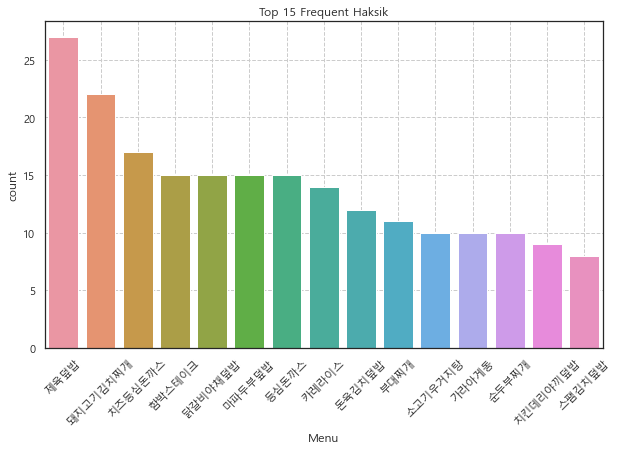

In [29]:
filtered_df = main_menu[main_menu['Menu'].isin(main_menu['Menu'].value_counts().nlargest(15).index)]

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='Menu', data=filtered_df, order=filtered_df['Menu'].value_counts().index)
plt.title("Top 15 Frequent Haksik")
plt.grid(linestyle='--')

In [30]:
main_menu['Menu'].value_counts().value_counts().sort_index(ascending=False)

27     1
22     1
17     1
15     4
14     1
12     1
11     1
10     3
9      1
8      3
7      4
6      4
5      1
4      2
3      5
2      8
1     22
Name: Menu, dtype: int64

In [31]:
main_menu

,Date,Menu,Calories,Is_lunch
0,2023-02-13,함박스테이크,740,True
1,2023-02-13,닭갈비야채덮밥,750,False
2,2023-02-14,사천짜장덮밥,810,True
3,2023-02-14,토마토파스타,830,False
4,2023-02-15,돼지고기김치찌개,780,True
...,...,...,...,...
339,2023-11-08,치킨데리야끼덮밥,880,False
340,2023-11-09,가라아게카레덮밥,860,True
341,2023-11-09,해물볶음우동,780,False
342,2023-11-10,유부잔치국수,840,True


In [32]:
val_count = main_menu['Menu'].value_counts()
other_menus = val_count[val_count <= 2].index.values

In [33]:
cat_int = copy.deepcopy(val_count)
for i in range(len(cat_int)):
    cat_int[i] = 0 if cat_int.index.values[i] in other_menus else (i+1)

In [34]:
(cat_int[cat_int>=1])

제육덮밥         1
돼지고기김치찌개     2
치즈등심돈까스      3
마파두부덮밥       4
닭갈비야채덮밥      5
등심돈까스        6
함박스테이크       7
카레라이스        8
돈육김치덮밥       9
부대찌개        10
소고기우거지탕     11
가라아게동       12
순두부찌개       13
치킨데리야끼덮밥    14
스팸김치덮밥      15
치킨하이라이스     16
오삼야채덮밥      17
가츠동         18
가라아게카레덮밥    19
육개장         20
오므라이스       21
필라프         22
소고기덮밥       23
토마토파스타      24
사천짜장덮밥      25
볶음우동        26
불고기덮밥       27
파스타         28
치킨스테이크      29
지코바치밥       30
육개장칼국수      31
소고기장터국밥     32
잡채덮밥        33
Name: Menu, dtype: int64

In [36]:
df_all = copy.deepcopy(main_menu)
df_all['Menu_modified'] = df_all['Menu']
df_all.loc[df_all['Menu_modified'].isin(other_menus), 'Menu_modified'] = '기타'
df_all['Label'] = cat_int[df_all['Menu']].reset_index(drop=True)
df_all = pd.concat([df_all, pd.get_dummies(data=df_all['Label'], prefix='Label')], axis=1)
df_all['Index'] = df_all.index.values
df_all['Date_delta'] = (df_all['Date'] - df_all['Date'].iloc[0]).dt.days
df_all

,Date,Menu,Calories,Is_lunch,Menu_modified,Label,Label_0,Label_1,Label_2,Label_3,...,Label_26,Label_27,Label_28,Label_29,Label_30,Label_31,Label_32,Label_33,Index,Date_delta
0,2023-02-13,함박스테이크,740,True,함박스테이크,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023-02-13,닭갈비야채덮밥,750,False,닭갈비야채덮밥,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2023-02-14,사천짜장덮밥,810,True,사천짜장덮밥,25,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,2023-02-14,토마토파스타,830,False,토마토파스타,24,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
4,2023-02-15,돼지고기김치찌개,780,True,돼지고기김치찌개,2,0,0,1,0,...,0,0,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2023-11-08,치킨데리야끼덮밥,880,False,치킨데리야끼덮밥,14,0,0,0,0,...,0,0,0,0,0,0,0,0,339,268
340,2023-11-09,가라아게카레덮밥,860,True,가라아게카레덮밥,19,0,0,0,0,...,0,0,0,0,0,0,0,0,340,269
341,2023-11-09,해물볶음우동,780,False,기타,0,1,0,0,0,...,0,0,0,0,0,0,0,0,341,269
342,2023-11-10,유부잔치국수,840,True,기타,0,1,0,0,0,...,0,0,0,0,0,0,0,0,342,270


In [22]:
main_menu.loc[main_menu['Menu'].str.contains('제육')&main_menu['Menu'].str.contains('덮밥'),:]

,Date,Menu,Calories,Is_lunch
9,2023-02-17,제육야채덮밥,780,False
16,2023-02-23,제육야채덮밥,720,True
25,2023-03-02,제육야채덮밥,720,False
42,2023-03-15,제육김치덮밥,780,True
47,2023-03-17,제육야채덮밥,780,False
49,2023-03-20,제육야채덮밥,750,False
63,2023-03-29,제육야채덮밥,720,False
69,2023-04-03,제육야채덮밥,750,False
81,2023-04-11,제육야채덮밥,830,False
106,2023-04-28,제육야채덮밥,780,True
